<a href="https://colab.research.google.com/github/drewmayberry11/Machine_Learning_Data_Sets/blob/main/Project5_FOX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOX Group Machine Learning Project 5




# Voter Turnout Prediction Project 5

## **Overview**
Project 5 focuses on predicting voter turnout rates using a combination of socio-economic, demographic, and historical data. The analysis involves the following key steps:
- **Data Collection**: Gathering and importing relevant datasets with voter turnout information.
- **Data Preprocessing**: Cleaning data, handling missing values, addressing outliers, and normalizing numerical features.
- **Exploratory Data Analysis (EDA)**: Visualizing trends, identifying correlations, and understanding the key factors influencing voter turnout.
- **Model Selection, Training, and Evaluation**: Building machine learning models to predict voter turnout and assessing their performance.
- **Feature Importance Analysis**: Determining the most influential factors in voter turnout predictions.
- **Predictions for Future Years**: Using trained models to forecast voter turnout rates for specific demographics and time frames.

---

## **Objective**
The objective is to build a data-driven machine learning pipeline that can predict the likelihood of voter turnout using historical data. This model helps uncover trends and identify critical factors that influence voter participation.





## **Import Libraries and Set Plot Style**
This cell imports the required libraries for data analysis, visualization, and machine learning. It also sets the Seaborn style to `whitegrid` for consistent and clean visualizations.


In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler

# Model building and evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Set visual style for plots
sns.set(style="whitegrid")




## 1. Data Collection

In [2]:
# Cell 2: Data Collection
# Load the dataset using the raw GitHub URL
url = "https://raw.githubusercontent.com/drewmayberry11/Machine_Learning_Data_Sets/main/voter_turnout_project5.csv"
# Specify the decimal parameter to handle commas as decimal points
voter_data = pd.read_csv(url, decimal=',', skipinitialspace=True)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
voter_data



First few rows of the dataset:


,Year,Voting Population,Total Voter Turnout,White,Black,Asian,Hispanic,Male,Female,18 to 24,22 to 44,45 to 64,65 and Over
0,2020,252274000,66.8,68.3,62.6,59.7,52.5,59.5,63.0,15.9,55.0,65.5,71.9
1,2016,245502000,61.4,62.9,59.4,49.0,44.9,53.8,58.1,19.6,49.0,61.7,68.4
2,2012,235248000,61.8,62.2,66.2,47.3,43.1,54.4,58.5,19.9,49.5,63.4,69.7
3,2008,225499000,63.6,64.4,64.7,47.6,46.5,55.7,60.4,17.2,51.9,65.0,68.1
4,2004,215694000,63.8,65.4,60.0,44.2,42.9,56.3,60.1,16.6,52.2,66.6,68.9
5,2000,202609000,59.5,60.5,56.8,43.3,38.9,53.1,56.2,20.1,49.8,64.1,67.6
6,1996,193652000,58.4,59.6,53.0,45.0,37.9,52.8,55.5,20.4,49.2,64.4,67.0
7,1992,185684000,67.7,69.2,59.2,53.9,41.5,60.2,62.3,21.9,58.3,70.0,70.1
8,1988,178098000,62.2,63.4,55.0,NaN,38.5,56.4,58.3,24.8,54.0,67.9,68.8
9,1984,169963000,64.9,65.7,60.6,NaN,32.7,59.0,60.8,23.5,58.4,69.8,67.7


In [ ]:
# Cell 3
# Check for missing values
print("Missing Values per Column:\n", voter_data.isnull().sum())

# Handle missing values
# Impute missing values (use median for numerical, mode for categorical)
for column in voter_data.columns:
    if voter_data[column].dtype in ['float64', 'int64']:
        voter_data[column] = voter_data[column].fillna(voter_data[column].median())
    else:
        voter_data[column] = voter_data[column].fillna(voter_data[column].mode()[0])

# Verify that there are no remaining missing values


Missing Values per Column:
 Year                   0
Voting Population      0
Total Voter Turnout    0
White                  0
Black                  0
Asian                  7
Hispanic               2
Male                   0
Female                 0
18 to 24               2
22 to 44               0
45 to 64               0
65 and Over            0
dtype: int64


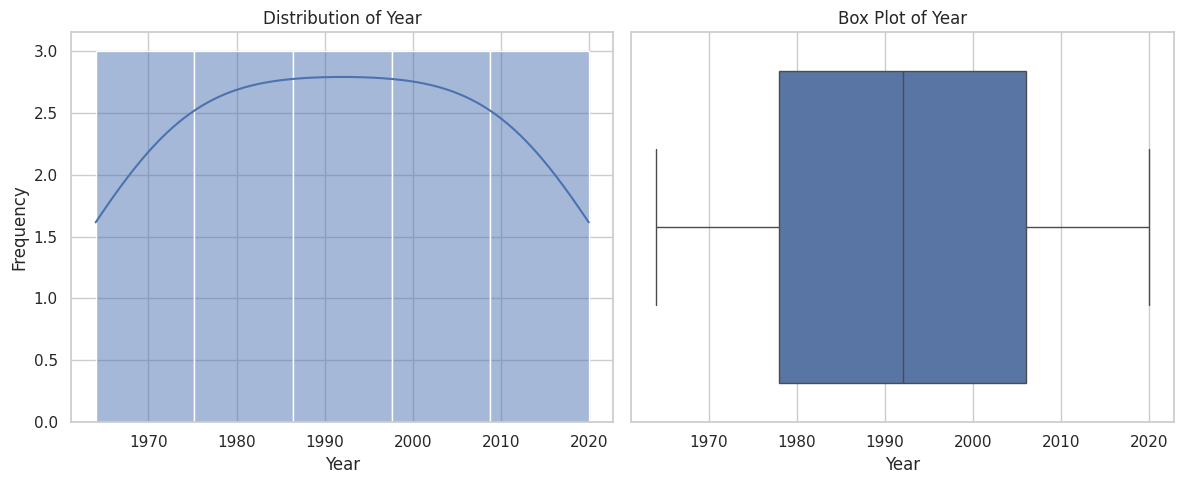

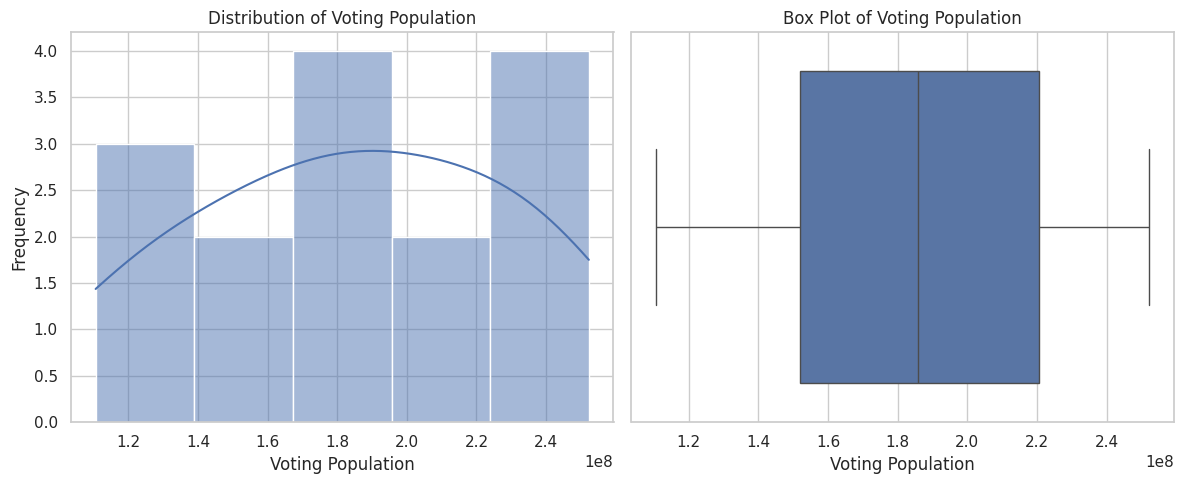

In [ ]:
# Cell 3.5

# Cell 3.5: Visualize Outliers in Numeric Columns

# Select only numeric columns
numeric_cols = voter_data.select_dtypes(include=[np.number])

# Loop through each numeric column to plot histograms and box plots
for col in numeric_cols.columns:
    plt.figure(figsize=(12, 5))

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(voter_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=voter_data[col])
    plt.title(f'Box Plot of {col}')

    # Display plots
    plt.tight_layout()
    plt.show()


## Detect outliers using the IQR method (numeric columns only)

In [ ]:
# Cell 4: Outlier Detection and Removal

# Select only numeric columns for outlier detection
numeric_cols = voter_data.select_dtypes(include=[np.number])

# Calculate Q1, Q3, and IQR for numeric columns
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Define a condition to identify outliers beyond 1.5 * IQR
outliers = (numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))

# Display count of outliers per column
print("\nOutliers per Column:\n", outliers.sum())

# Remove rows with outliers in any numeric column
voter_data = voter_data[~outliers.any(axis=1)]

# Display summary after outlier removal
print("\nSummary Statistics after Outlier Removal:")
print(voter_data.describe())



Outliers per Column:
 Year                 0
Voting Population    0
dtype: int64

Summary Statistics after Outlier Removal:
              Year  Voting Population
count    15.000000       1.500000e+01
mean   1992.000000       1.847465e+08
std      17.888544       4.536581e+07
min    1964.000000       1.106040e+08
25%    1978.000000       1.518165e+08
50%    1992.000000       1.856840e+08
75%    2006.000000       2.205965e+08
max    2020.000000       2.522740e+08


## Normalize numerical features using Min-Max Scaling (excluding 'Year')

In [ ]:
# Cell 5
from sklearn.preprocessing import MinMaxScaler

# Exclude the 'Year' column from normalization
numerical_columns = voter_data.select_dtypes(include=['float64', 'int64']).columns.difference(['Year'])

# Apply Min-Max Scaling only to selected numerical columns
scaler = MinMaxScaler()
voter_data[numerical_columns] = scaler.fit_transform(voter_data[numerical_columns])

# Display the normalized data
print("\nData after Normalization:")
voter_data


Data after Normalization:


,Year,Voting Population,Total Voter Turnout,White,Black,Asian,Hispanic,Male,Female,18 to 24,22 to 44,45 to 64,65 and Over
0,2020,1.000000,66.8,68.3,62.6,59.7,52.5,59.5,63.0,15.9,55.0,65.5,71.9
1,2016,0.952199,61.4,62.9,59.4,49.0,44.9,53.8,58.1,19.6,49.0,61.7,68.4
2,2012,0.879819,61.8,62.2,66.2,47.3,43.1,54.4,58.5,19.9,49.5,63.4,69.7
3,2008,0.811004,63.6,64.4,64.7,47.6,46.5,55.7,60.4,17.2,51.9,65.0,68.1
4,2004,0.741794,63.8,65.4,60.0,44.2,42.9,56.3,60.1,16.6,52.2,66.6,68.9
5,2000,0.649432,59.5,60.5,56.8,43.3,38.9,53.1,56.2,20.1,49.8,64.1,67.6
6,1996,0.586207,58.4,59.6,53.0,45.0,37.9,52.8,55.5,20.4,49.2,64.4,67.0
7,1992,0.529964,67.7,69.2,59.2,53.9,41.5,60.2,62.3,21.9,58.3,70.0,70.1
8,1988,0.476417,62.2,63.4,55.0,43.3,38.5,56.4,58.3,24.8,54.0,67.9,68.8
9,1984,0.418995,64.9,65.7,60.6,43.3,32.7,59.0,60.8,23.5,58.4,69.8,67.7


## Ensure all numeric columns are indeed numeric, and handle conversion errors

In [ ]:
#cell 6
for column in voter_data.columns:
    if column != "Year":  # Skip 'Year' column to avoid changing its integer format
        voter_data[column] = pd.to_numeric(voter_data[column], errors='coerce')

# Handle any remaining missing values after conversion
voter_data.fillna(voter_data.median(numeric_only=True), inplace=True)

# Verify that columns are numeric and check for any remaining missing values
print("Data Types after conversion:\n", voter_data.dtypes)
print("\nRemaining Missing Values:\n", voter_data.isnull().sum())


Data Types after conversion:
 Year                     int64
Voting Population      float64
Total Voter Turnout    float64
White                  float64
Black                  float64
Asian                  float64
Hispanic               float64
Male                   float64
Female                 float64
18 to 24               float64
22 to 44               float64
45 to 64               float64
65 and Over            float64
dtype: object

Remaining Missing Values:
 Year                   0
Voting Population      0
Total Voter Turnout    0
White                  0
Black                  0
Asian                  0
Hispanic               0
Male                   0
Female                 0
18 to 24               0
22 to 44               0
45 to 64               0
65 and Over            0
dtype: int64


In [ ]:
#cell 7
# Strip any extra spaces from the column names
voter_data.columns = voter_data.columns.str.strip()

# Verify the cleaned column names
print("Cleaned column names:", voter_data.columns)


# Ensure all relevant columns are numeric
numeric_columns = ['Voting Population', 'Total Voter Turnout', 'White', 'Black',
                   'Hispanic', 'Male', 'Female', '18 to 24', '22 to 44', '45 to 64', '65 and Over']
for column in numeric_columns:
    voter_data[column] = pd.to_numeric(voter_data[column], errors='coerce')

# Handle missing values after conversion if necessary
voter_data.fillna(voter_data.median(), inplace=True)

# Feature engineering function
def create_meaningful_features(df):
    df['Gender_Gap'] = df['Female'] - df['Male']
    df['White_Black_Gap'] = df['White'] - df['Black']
    df['White_Hispanic_Gap'] = df['White'] - df['Hispanic']
    df['Youth_Senior_Gap'] = df['65 and Over'] - df['18 to 24']
    df['Turnout_Change'] = df['Total Voter Turnout'] - df['Total Voter Turnout'].shift(1)
    df['Population_Growth'] = (df['Voting Population'] - df['Voting Population'].shift(1)) / df['Voting Population'].shift(1) * 100
    return df

# Apply feature engineering
voter_data = create_meaningful_features(voter_data)

# Display summary of new features
print("\nSummary of New Features:")
print(voter_data[['Gender_Gap', 'White_Black_Gap', 'White_Hispanic_Gap',
                  'Youth_Senior_Gap', 'Turnout_Change', 'Population_Growth']].describe())

Cleaned column names: Index(['Year', 'Voting Population', 'Total Voter Turnout', 'White', 'Black',
       'Asian', 'Hispanic', 'Male', 'Female', '18 to 24', '22 to 44',
       '45 to 64', '65 and Over'],
      dtype='object')

Summary of New Features:
       Gender_Gap  White_Black_Gap  White_Hispanic_Gap  Youth_Senior_Gap  \
count    15.00000        15.000000           15.000000         15.000000   
mean      1.38000         7.466667           26.793333         46.273333   
std       3.01501         5.896327            8.387871          6.776057   
min      -4.90000        -4.000000           15.800000         31.800000   
25%      -0.25000         4.400000           20.350000         44.100000   
50%       2.10000         6.600000           24.900000         48.200000   
75%       3.65000        11.500000           34.250000         50.150000   
max       4.70000        20.300000           40.800000         56.000000   

       Turnout_Change  Population_Growth  
count       14.00000

## histograms, scatter plots, and heatmaps

<ipython-input-79-1bd01f97df47>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=voter_data_sorted, x='Year', y='Total Voter Turnout', palette='viridis')


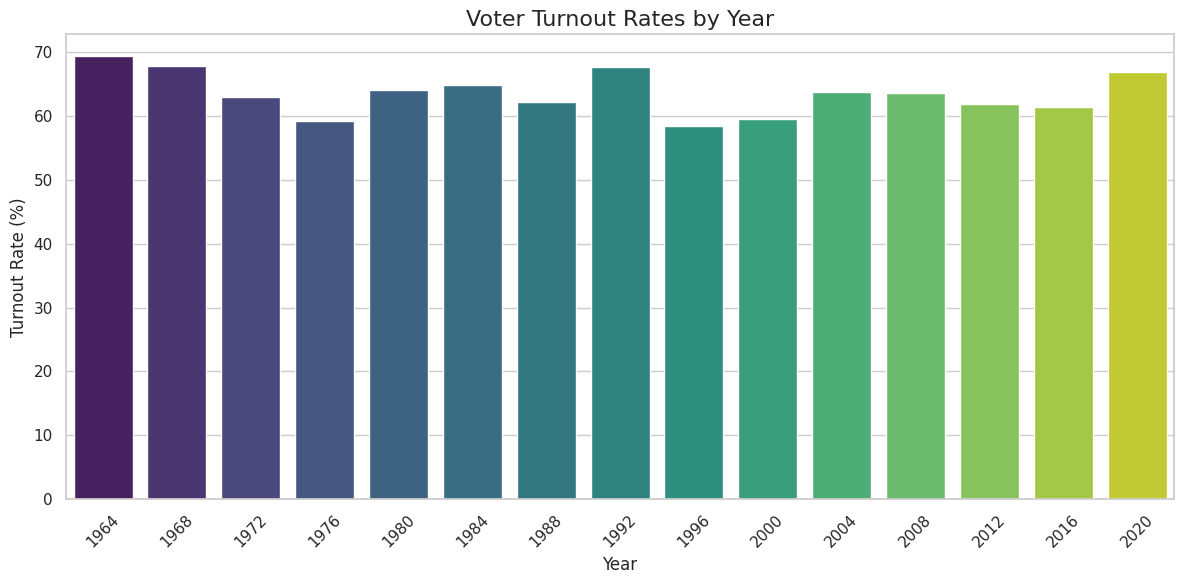

In [ ]:
# Cell 8.1: Histogram of Voter Turnout Rates by Year

import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 6))

# Sort data by Year
voter_data_sorted = voter_data.sort_values('Year')

# Plot
sns.barplot(data=voter_data_sorted, x='Year', y='Total Voter Turnout', palette='viridis')

# Formatting
plt.title('Voter Turnout Rates by Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Turnout Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-80-269e74bbb0b4>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=age_data_melted, x='Age Group', y='Age Group Turnout', palette='Set2')


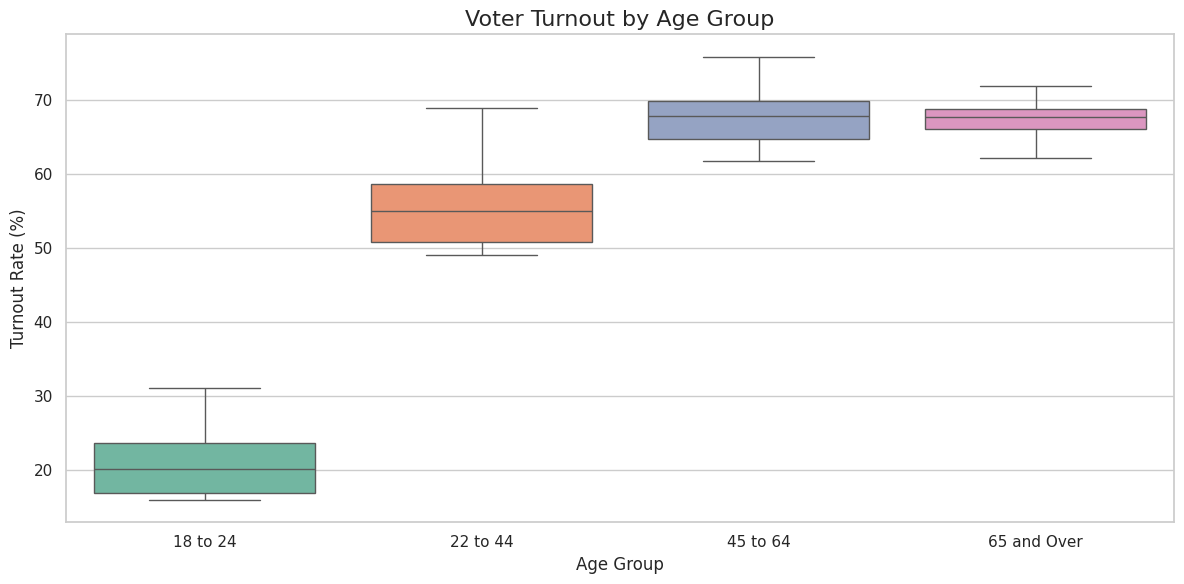

In [ ]:
# Cell 8.2: Box Plots for Voter Turnout by Age Groups

# Prepare data in long format for seaborn
age_groups = ['18 to 24', '22 to 44', '45 to 64', '65 and Over']
age_data = voter_data[['Year'] + age_groups + ['Total Voter Turnout']]

# Melt the dataframe to long format
age_data_melted = age_data.melt(id_vars=['Year', 'Total Voter Turnout'], value_vars=age_groups,
                                var_name='Age Group', value_name='Age Group Turnout')

plt.figure(figsize=(12, 6))

# Box plot
sns.boxplot(data=age_data_melted, x='Age Group', y='Age Group Turnout', palette='Set2')

# Formatting
plt.title('Voter Turnout by Age Group', fontsize=16)
plt.xlabel('Age Group')
plt.ylabel('Turnout Rate (%)')
plt.tight_layout()
plt.show()



<ipython-input-81-baf47d57d210>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=race_data_melted, x='Race/Ethnicity', y='Race Turnout', palette='Set3')


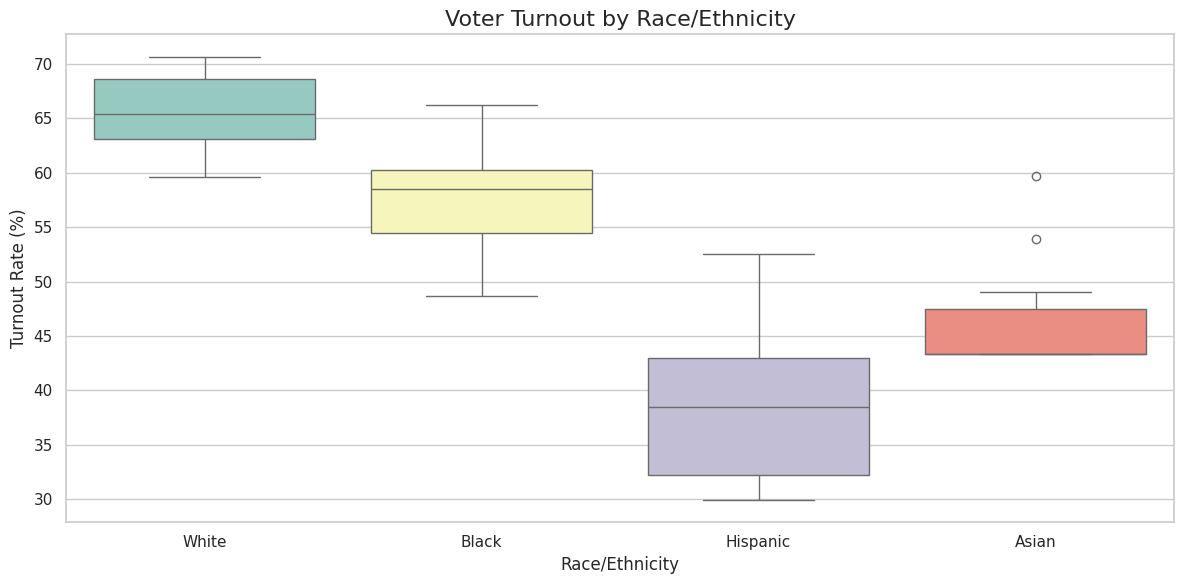

In [ ]:
# Cell 8.3: Box Plots for Voter Turnout by Race/Ethnicity

# Prepare data in long format
race_groups = ['White', 'Black', 'Hispanic', 'Asian']
race_data = voter_data[['Year'] + race_groups + ['Total Voter Turnout']]

# Melt the dataframe to long format
race_data_melted = race_data.melt(id_vars=['Year', 'Total Voter Turnout'], value_vars=race_groups,
                                  var_name='Race/Ethnicity', value_name='Race Turnout')

plt.figure(figsize=(12, 6))

# Box plot
sns.boxplot(data=race_data_melted, x='Race/Ethnicity', y='Race Turnout', palette='Set3')

# Formatting
plt.title('Voter Turnout by Race/Ethnicity', fontsize=16)
plt.xlabel('Race/Ethnicity')
plt.ylabel('Turnout Rate (%)')
plt.tight_layout()
plt.show()


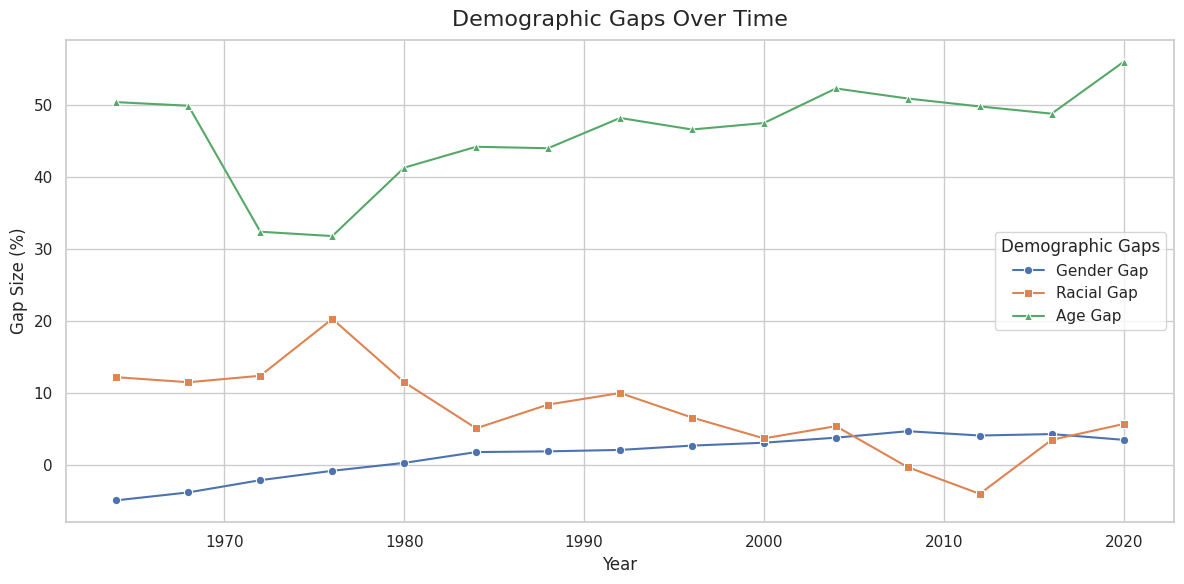

In [ ]:
# Cell 8.4: Time Series of Demographic Gaps

plt.figure(figsize=(12, 6))

# Plot each demographic gap over time
sns.lineplot(data=voter_data, x='Year', y='Gender_Gap', label='Gender Gap', marker='o')
sns.lineplot(data=voter_data, x='Year', y='White_Black_Gap', label='Racial Gap', marker='s')
sns.lineplot(data=voter_data, x='Year', y='Youth_Senior_Gap', label='Age Gap', marker='^')

# Formatting
plt.title('Demographic Gaps Over Time', size=16, pad=10)
plt.xlabel('Year')
plt.ylabel('Gap Size (%)')
plt.legend(title='Demographic Gaps')
plt.grid(True)
plt.tight_layout()
plt.show()


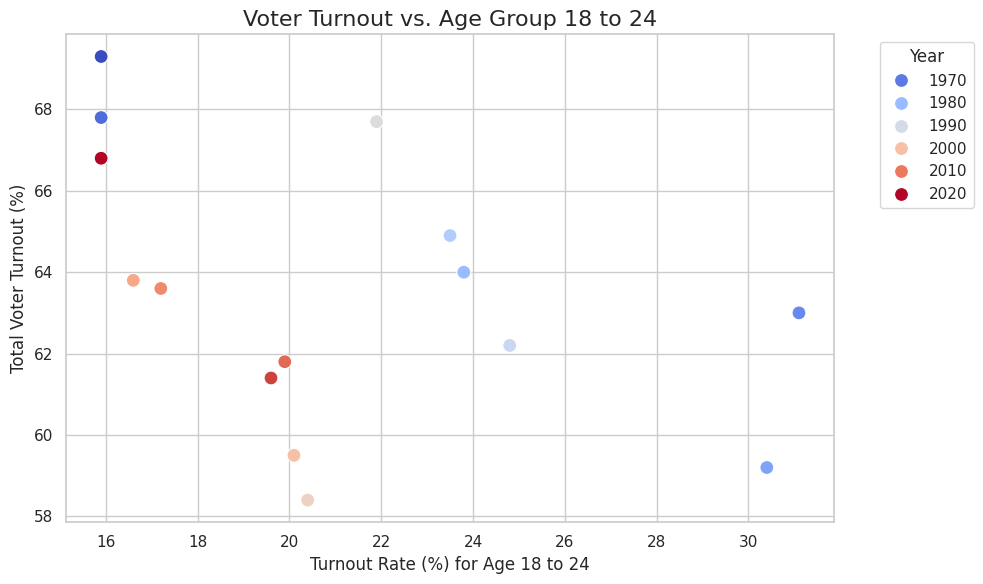

In [ ]:
# Cell 8.5a: Scatter Plot - Age Group 18 to 24 vs. Voter Turnout

plt.figure(figsize=(10, 6))

sns.scatterplot(data=voter_data, x='18 to 24', y='Total Voter Turnout', hue='Year', palette='coolwarm', s=100)

# Formatting
plt.title('Voter Turnout vs. Age Group 18 to 24', fontsize=16)
plt.xlabel('Turnout Rate (%) for Age 18 to 24')
plt.ylabel('Total Voter Turnout (%)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


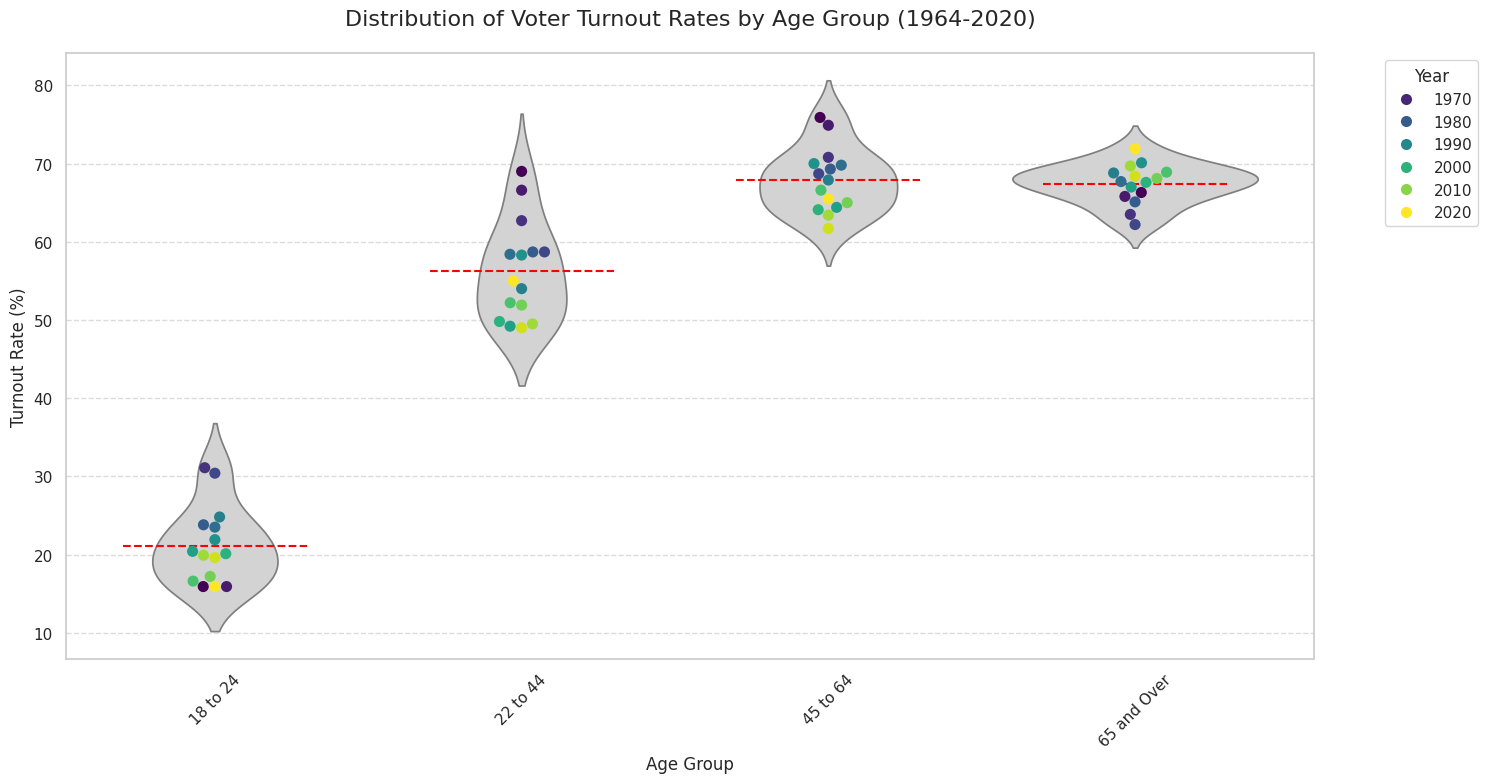


Statistical Summary by Age Group:
--------------------------------------------------

18 to 24:
Mean Turnout: 21.13%
Median Turnout: 20.10%
Std Dev: 4.90%
Min: 15.90%
Max: 31.10%

22 to 44:
Mean Turnout: 56.20%
Median Turnout: 55.00%
Std Dev: 6.34%
Min: 49.00%
Max: 69.00%

45 to 64:
Mean Turnout: 67.87%
Median Turnout: 67.90%
Std Dev: 4.08%
Min: 61.70%
Max: 75.90%

65 and Over:
Mean Turnout: 67.41%
Median Turnout: 67.70%
Std Dev: 2.54%
Min: 62.20%
Max: 71.90%


In [ ]:
# Cell 8.5a: Violin Plot with Swarm for Age Group Turnout Analysis

# Create a figure
plt.figure(figsize=(15, 8))

# Prepare data for violin plot
age_cols = ['18 to 24', '22 to 44', '45 to 64', '65 and Over']
plot_data = voter_data.melt(
    id_vars=['Year', 'Total Voter Turnout'],
    value_vars=age_cols,
    var_name='Age Group',
    value_name='Turnout Rate'
)

# Create violin plot with swarm overlay
# Violin shows distribution
sns.violinplot(data=plot_data, x='Age Group', y='Turnout Rate',
               inner=None, color='lightgray')

# Swarm plot shows actual data points
sns.swarmplot(data=plot_data, x='Age Group', y='Turnout Rate',
              hue='Year', size=8, palette='viridis')

# Customize the plot
plt.title('Distribution of Voter Turnout Rates by Age Group (1964-2020)', fontsize=16, pad=20)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Turnout Rate (%)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Customize legend
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add mean lines to violin plots
means = plot_data.groupby('Age Group')['Turnout Rate'].mean()
plt.hlines(y=means, xmin=[-0.3, 0.7, 1.7, 2.7], xmax=[0.3, 1.3, 2.3, 3.3],
           color='red', linestyles='dashed', label='Mean Turnout')

# Add grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print statistical summary
print("\nStatistical Summary by Age Group:")
print("-" * 50)
for age_group in age_cols:
    print(f"\n{age_group}:")
    print(f"Mean Turnout: {voter_data[age_group].mean():.2f}%")
    print(f"Median Turnout: {voter_data[age_group].median():.2f}%")
    print(f"Std Dev: {voter_data[age_group].std():.2f}%")
    print(f"Min: {voter_data[age_group].min():.2f}%")
    print(f"Max: {voter_data[age_group].max():.2f}%")

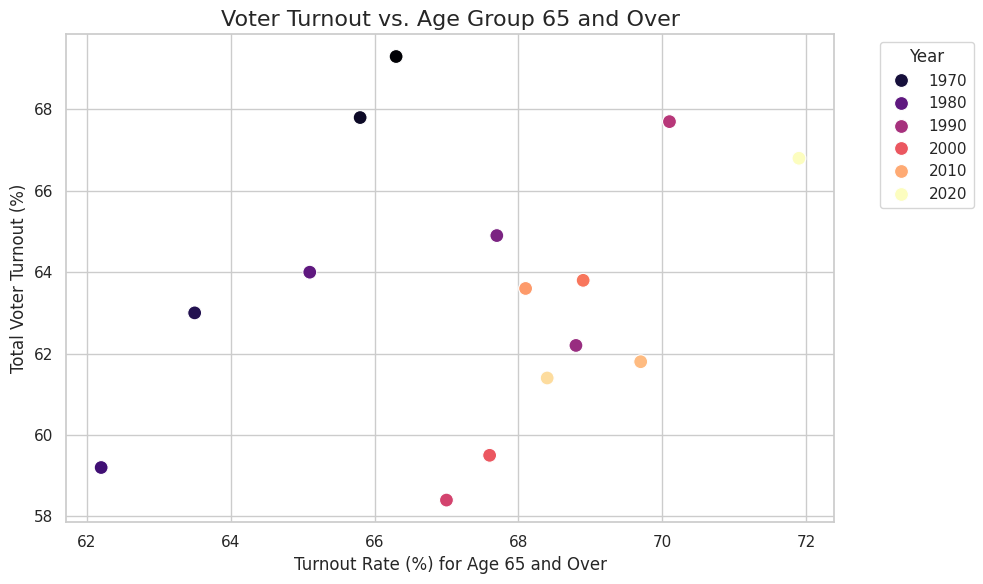

In [ ]:
# Cell 8.5b: Scatter Plot - Age Group 65 and Over vs. Voter Turnout

plt.figure(figsize=(10, 6))

sns.scatterplot(data=voter_data, x='65 and Over', y='Total Voter Turnout', hue='Year', palette='magma', s=100)

# Formatting
plt.title('Voter Turnout vs. Age Group 65 and Over', fontsize=16)
plt.xlabel('Turnout Rate (%) for Age 65 and Over')
plt.ylabel('Total Voter Turnout (%)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


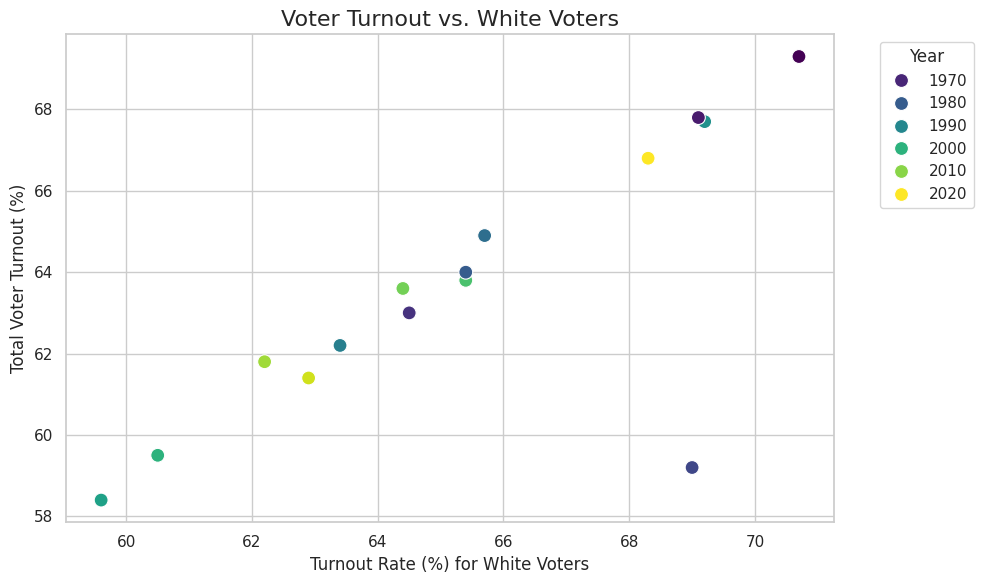

In [ ]:
# Cell 8.5c: Scatter Plot - White Voters vs. Total Voter Turnout

plt.figure(figsize=(10, 6))

sns.scatterplot(data=voter_data, x='White', y='Total Voter Turnout', hue='Year', palette='viridis', s=100)

# Formatting
plt.title('Voter Turnout vs. White Voters', fontsize=16)
plt.xlabel('Turnout Rate (%) for White Voters')
plt.ylabel('Total Voter Turnout (%)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


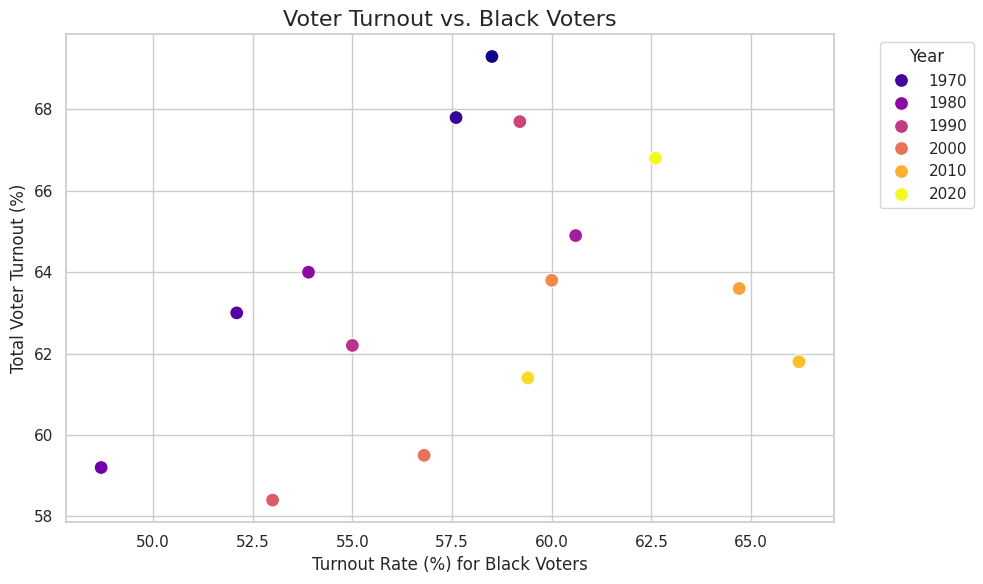

In [ ]:
# Cell 8.5d: Scatter Plot - Black Voters vs. Total Voter Turnout

plt.figure(figsize=(10, 6))

sns.scatterplot(data=voter_data, x='Black', y='Total Voter Turnout', hue='Year', palette='plasma', s=100)

# Formatting
plt.title('Voter Turnout vs. Black Voters', fontsize=16)
plt.xlabel('Turnout Rate (%) for Black Voters')
plt.ylabel('Total Voter Turnout (%)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1400x700 with 0 Axes>

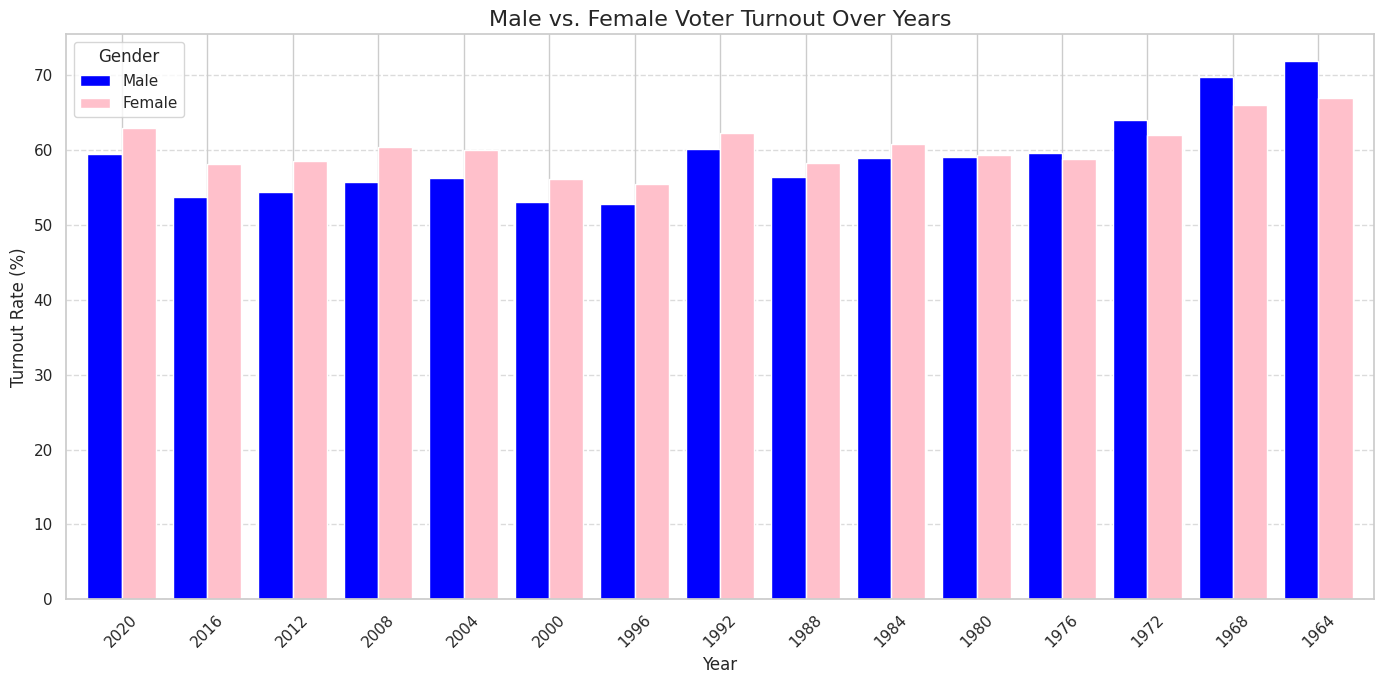

In [ ]:
# Bar Chart for Male and Female Voter Turnout Over Years

# Prepare the data for male and female voter turnout
gender_turnout = voter_data[['Year', 'Male', 'Female']].set_index('Year')

# Plot the data
plt.figure(figsize=(14, 7))
gender_turnout.plot(kind='bar', figsize=(14, 7), color=['blue', 'pink'], width=0.8)

# Formatting
plt.title('Male vs. Female Voter Turnout Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Turnout Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['Male', 'Female'], title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


<Figure size 1400x700 with 0 Axes>

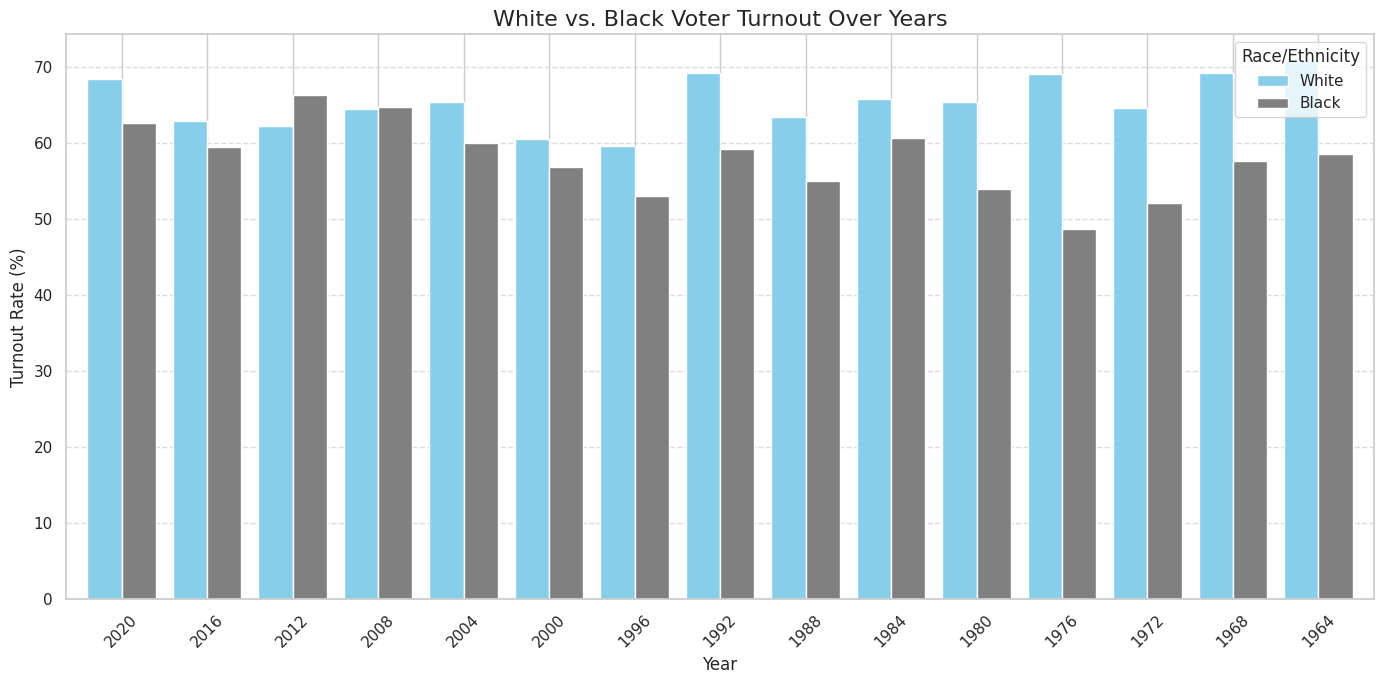

In [ ]:
# Bar Chart for White and Black Voter Turnout Over Years

# Prepare the data for white and black voter turnout
race_turnout = voter_data[['Year', 'White', 'Black']].set_index('Year')

# Plot the data
plt.figure(figsize=(14, 7))
race_turnout.plot(kind='bar', figsize=(14, 7), color=['skyblue', 'gray'], width=0.8)

# Formatting
plt.title('White vs. Black Voter Turnout Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Turnout Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['White', 'Black'], title='Race/Ethnicity')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Define demographic variables
demographic_vars = [
    'White', 'Black', 'Hispanic', 'Asian',
    'Male', 'Female',
    '18 to 24', '22 to 44', '45 to 64', '65 and Over',
    'Voting Population', 'Population_Growth',
    'Total Voter Turnout'
]

# Recompute the correlation matrix focusing on Total Voter Turnout
correlations = voter_data[demographic_vars].corr()['Total Voter Turnout'].sort_values(ascending=False)

# Print the top 5 positive correlations
print("\nTop 5 Features Positively Correlated with Voter Turnout:")
print(correlations.drop('Total Voter Turnout').head())

# Print the top 5 negative correlations
print("\nTop 5 Features Negatively Correlated with Voter Turnout:")
print(correlations.drop('Total Voter Turnout').tail())




Top 5 Features Positively Correlated with Voter Turnout:
Female      0.919278
White       0.773543
Male        0.753134
22 to 44    0.692810
45 to 64    0.683308
Name: Total Voter Turnout, dtype: float64

Top 5 Features Negatively Correlated with Voter Turnout:
65 and Over          0.259459
Hispanic            -0.091592
Voting Population   -0.310342
18 to 24            -0.443653
Population_Growth   -0.645878
Name: Total Voter Turnout, dtype: float64


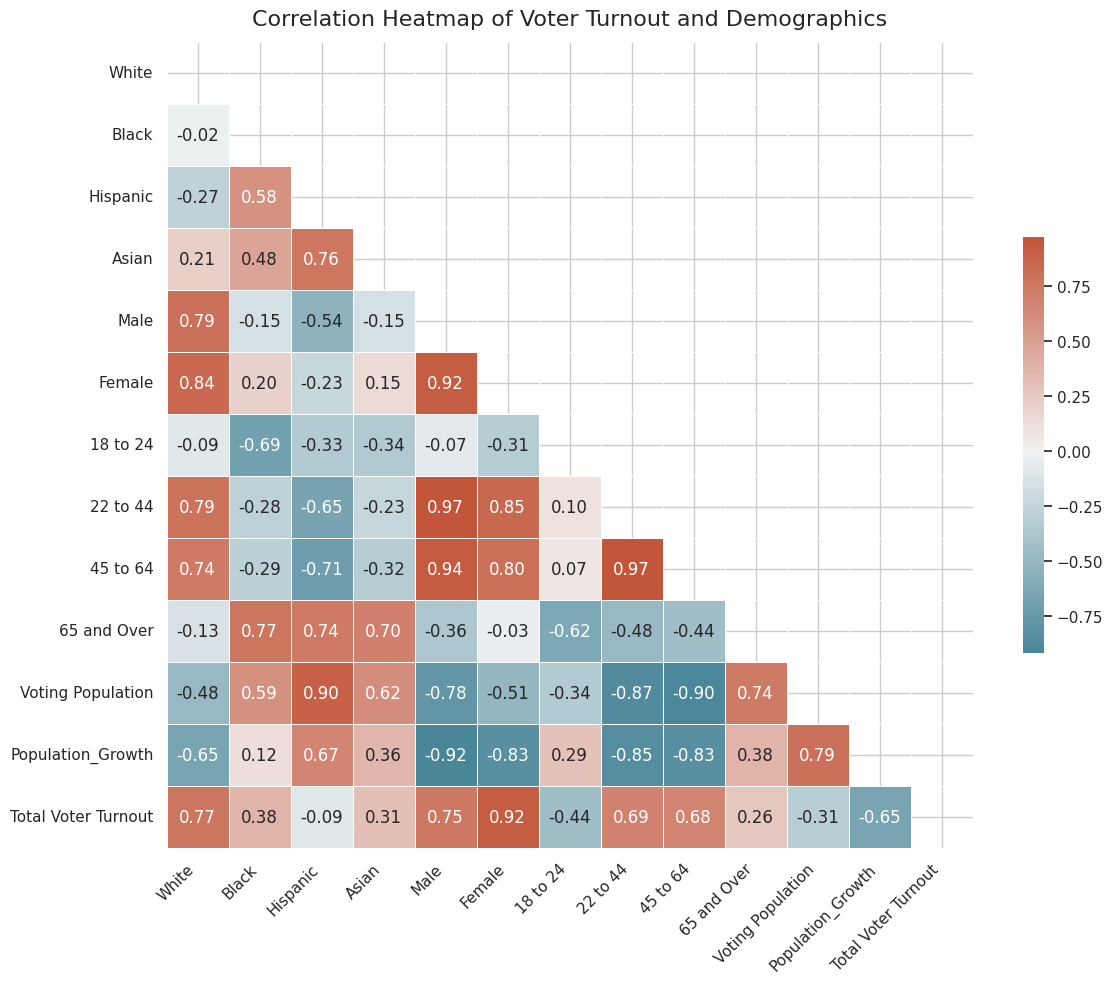

In [ ]:
# Cell 8.4: Correlation Heatmap (Revised)

import numpy as np

plt.figure(figsize=(12, 10))

# Select demographic variables
demographic_vars = [
    'White', 'Black', 'Hispanic', 'Asian',
    'Male', 'Female',
    '18 to 24', '22 to 44', '45 to 64', '65 and Over',
    'Voting Population', 'Population_Growth',
    'Total Voter Turnout'
]

# Compute the correlation matrix
corr_matrix = voter_data[demographic_vars].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Plot the heatmap
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap=cmap,
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    center=0
)
plt.title('Correlation Heatmap of Voter Turnout and Demographics', fontsize=16, pad=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# -*- coding: utf-8 -*-
# Cell 9: Define Features and Target
# ------------------------------------------

# Define target and features
target = 'Total Voter Turnout'
features = [
    'White', 'Black', 'Hispanic', 'Asian',
    'Male', 'Female',
    '18 to 24', '22 to 44', '45 to 64', '65 and Over',
    'Gender_Gap', 'White_Black_Gap', 'White_Hispanic_Gap',
    'Youth_Senior_Gap', 'Population_Growth'
]


In [ ]:
# Cell 10: Split Dataset into Training and Testing Sets
# ------------------------------------------

from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X = voter_data[features]
y = voter_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Cell 11: Initialize and Train the Random Forest Regressor
# ------------------------------------------

from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Cell 12: Predict and Evaluate the Model
# ------------------------------------------

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score


# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("\nRandom Forest Model Evaluation:")
print("-" * 40)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")



Random Forest Model Evaluation:
----------------------------------------
Mean Absolute Error (MAE): 2.30
Mean Squared Error (MSE): 9.38
Root Mean Squared Error (RMSE): 3.06
R² Score: 0.10



Feature Importance:
               Feature  Importance
5               Female    0.258122
0                White    0.231480
4                 Male    0.123366
12  White_Hispanic_Gap    0.092600
8             45 to 64    0.079763
7             22 to 44    0.055187
9          65 and Over    0.035197
6             18 to 24    0.032539
10          Gender_Gap    0.025667
14   Population_Growth    0.017938
2             Hispanic    0.013198
13    Youth_Senior_Gap    0.010631
11     White_Black_Gap    0.008866
3                Asian    0.007969
1                Black    0.007478


<ipython-input-95-f425277385da>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')


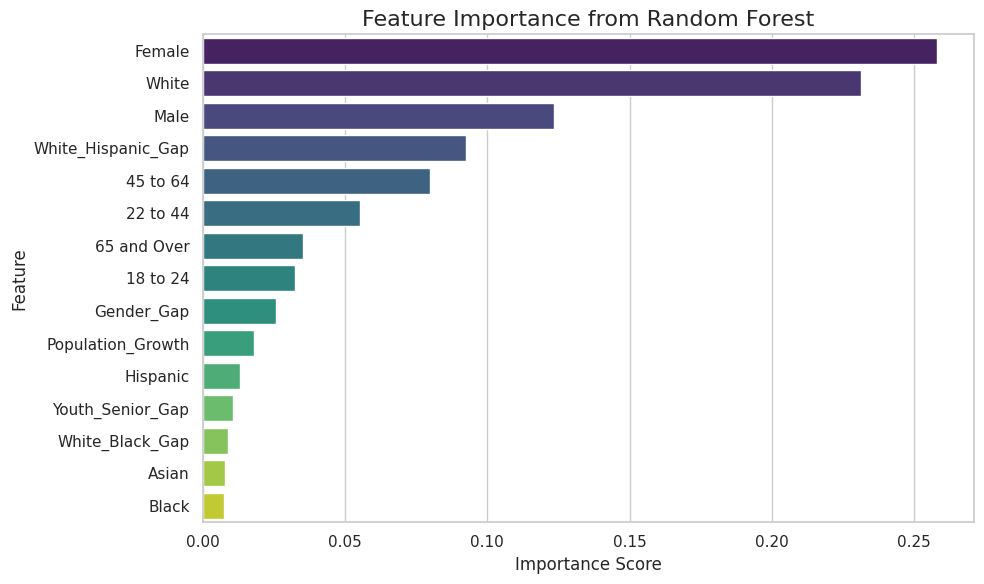

In [ ]:
# Cell 13: Analyze Feature Importance
# ------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance Analysis
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
# Cell 14: Optional - Cross-Validation
# ------------------------------------------

from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)

print("Cross-Validation RMSE Scores:", cv_rmse)
print(f"Mean Cross-Validation RMSE: {cv_rmse.mean():.2f}")


Cross-Validation RMSE Scores: [0.9955424  0.8478917  2.12826839 3.70904687 2.70708072]
Mean Cross-Validation RMSE: 2.08


In [ ]:
# Cell 15: Optional - Hyperparameter Tuning with GridSearchCV
# ------------------------------------------

from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Cell 16: Evaluate the Tuned Model
# ------------------------------------------

# Predict with the best model
y_pred_tuned = best_rf_model.predict(X_test)

# Evaluate
tuned_mae = mean_absolute_error(y_test, y_pred_tuned)
tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
tuned_r2 = r2_score(y_test, y_pred_tuned)

print("\nTuned Random Forest Model Evaluation:")
print("-" * 40)
print(f"Mean Absolute Error (MAE): {tuned_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {tuned_rmse:.2f}")
print(f"R² Score: {tuned_r2:.2f}")



Tuned Random Forest Model Evaluation:
----------------------------------------
Mean Absolute Error (MAE): 2.33
Root Mean Squared Error (RMSE): 3.20
R² Score: 0.02


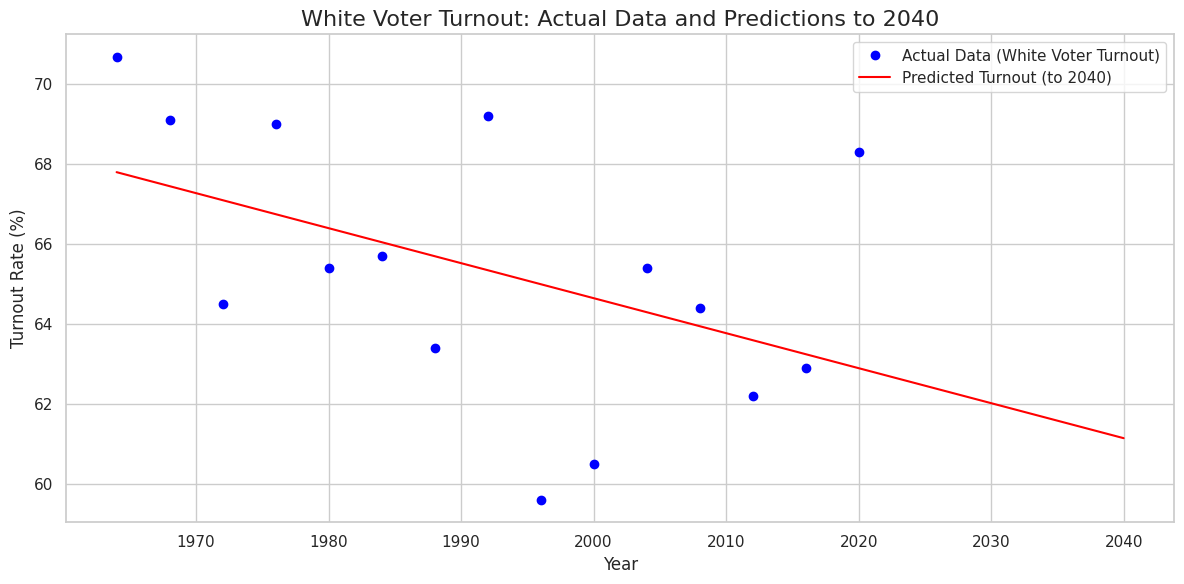

In [ ]:
# Prepare the data
# Extract the years and White voter turnout
years = voter_data['Year'].values.reshape(-1, 1)  # Use the 'Year' column as X
white_turnout = voter_data['White'].values  # Use White turnout as y

# Train the Linear Regression model
model = LinearRegression()
model.fit(years, white_turnout)

# Make predictions for future years
future_years = np.arange(years.min(), 2041).reshape(-1, 1)  # Predict from the earliest year to 2040
white_turnout_predictions = model.predict(future_years)

# Plot the actual data and predictions
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(years, white_turnout, 'o', label='Actual Data (White Voter Turnout)', color='blue')

# Plot predictions
plt.plot(future_years, white_turnout_predictions, '-', label='Predicted Turnout (to 2040)', color='red')

# Formatting the plot
plt.title('White Voter Turnout: Actual Data and Predictions to 2040', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Turnout Rate (%)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


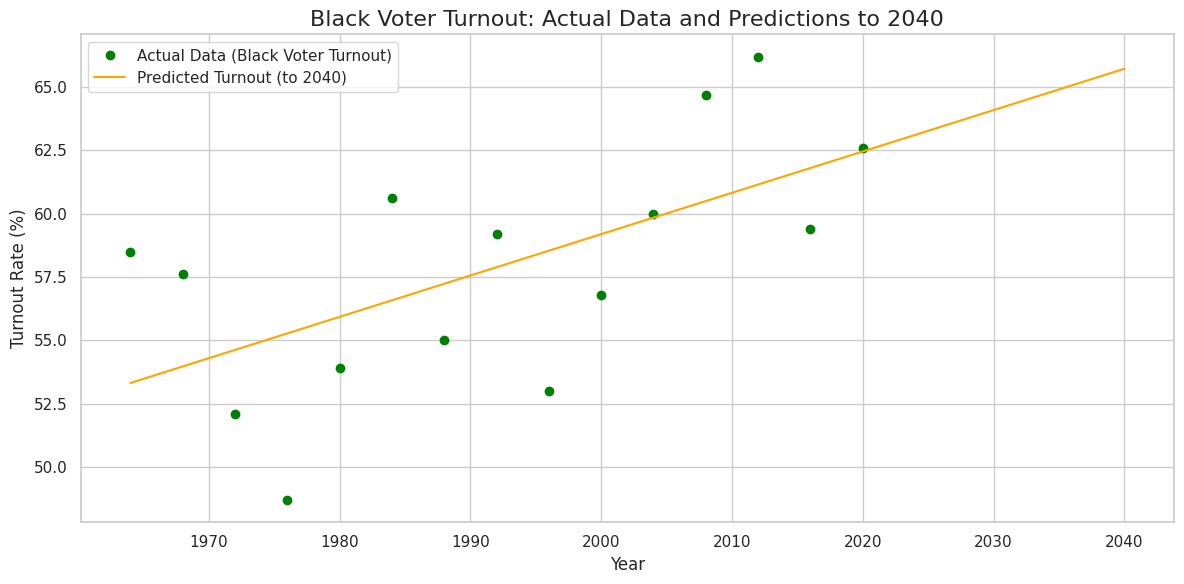

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Prepare the data for Black voter turnout
years = voter_data['Year'].values.reshape(-1, 1)  # Use the 'Year' column as X
black_turnout = voter_data['Black'].values  # Use Black turnout as y

# Train the Linear Regression model
model_black = LinearRegression()
model_black.fit(years, black_turnout)

# Make predictions for future years
future_years = np.arange(years.min(), 2041).reshape(-1, 1)  # Predict from the earliest year to 2040
black_turnout_predictions = model_black.predict(future_years)

# Plot the actual data and predictions for Black turnout
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(years, black_turnout, 'o', label='Actual Data (Black Voter Turnout)', color='green')

# Plot predictions
plt.plot(future_years, black_turnout_predictions, '-', label='Predicted Turnout (to 2040)', color='orange')

# Formatting the plot
plt.title('Black Voter Turnout: Actual Data and Predictions to 2040', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Turnout Rate (%)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


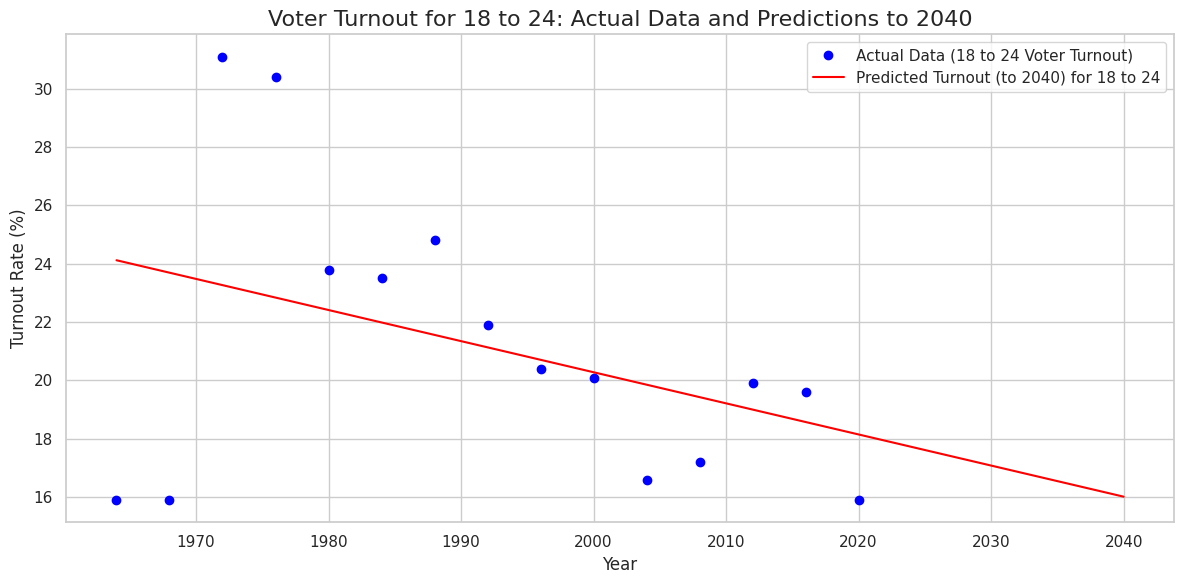

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Specify the age group you want to predict turnout for
age_group = '18 to 24'

# Prepare the data
# Extract the years and voter turnout for the specified age group
years = voter_data['Year'].values.reshape(-1, 1)  # Use the 'Year' column as X
age_turnout = voter_data[age_group].values  # Use the turnout for the specified age group as y

# Train the Linear Regression model
model = LinearRegression()
model.fit(years, age_turnout)

# Make predictions for future years
future_years = np.arange(years.min(), 2041).reshape(-1, 1)  # Predict from the earliest year to 2040
age_turnout_predictions = model.predict(future_years)

# Plot the actual data and predictions
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(years, age_turnout, 'o', label=f'Actual Data ({age_group} Voter Turnout)', color='blue')

# Plot predictions
plt.plot(future_years, age_turnout_predictions, '-', label=f'Predicted Turnout (to 2040) for {age_group}', color='red')

# Formatting the plot
plt.title(f'Voter Turnout for {age_group}: Actual Data and Predictions to 2040', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Turnout Rate (%)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


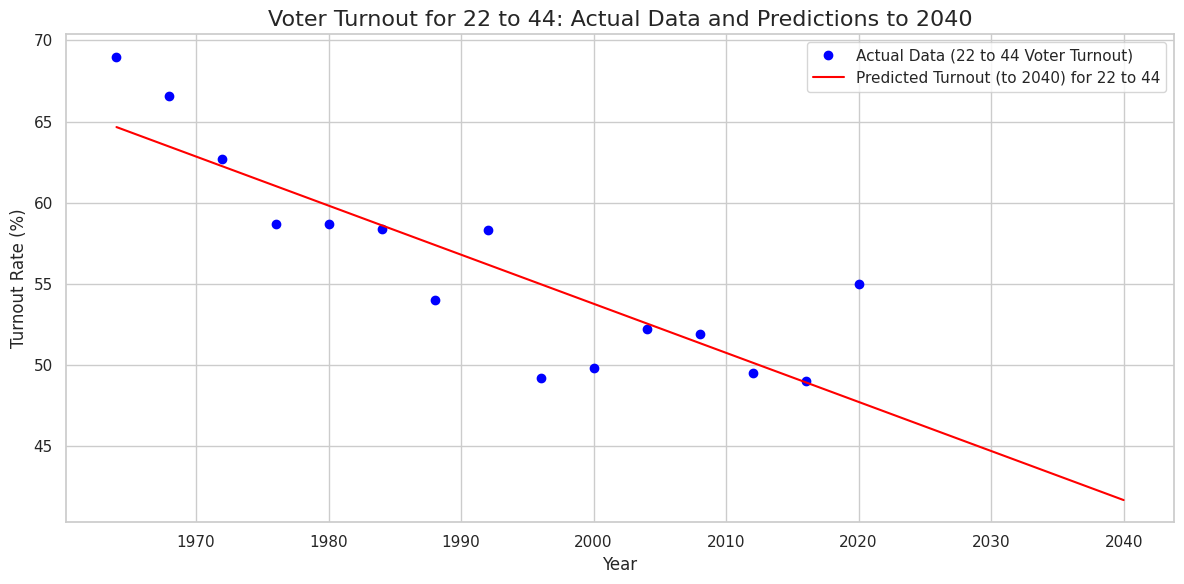

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Specify the age group you want to predict turnout for
age_group = '22 to 44'

# Prepare the data
# Extract the years and voter turnout for the specified age group
years = voter_data['Year'].values.reshape(-1, 1)  # Use the 'Year' column as X
age_turnout = voter_data[age_group].values  # Use the turnout for the specified age group as y

# Train the Linear Regression model
model = LinearRegression()
model.fit(years, age_turnout)

# Make predictions for future years
future_years = np.arange(years.min(), 2041).reshape(-1, 1)  # Predict from the earliest year to 2040
age_turnout_predictions = model.predict(future_years)

# Plot the actual data and predictions
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(years, age_turnout, 'o', label=f'Actual Data ({age_group} Voter Turnout)', color='blue')

# Plot predictions
plt.plot(future_years, age_turnout_predictions, '-', label=f'Predicted Turnout (to 2040) for {age_group}', color='red')

# Formatting the plot
plt.title(f'Voter Turnout for {age_group}: Actual Data and Predictions to 2040', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Turnout Rate (%)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


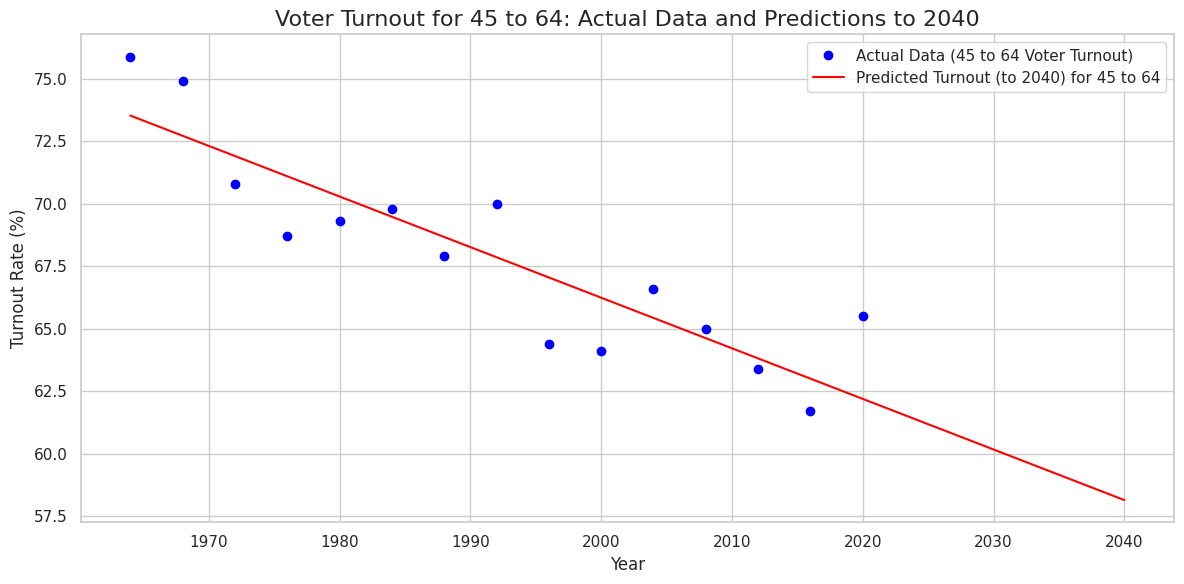

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Specify the age group you want to predict turnout for
age_group = '45 to 64'

# Prepare the data
# Extract the years and voter turnout for the specified age group
years = voter_data['Year'].values.reshape(-1, 1)  # Use the 'Year' column as X
age_turnout = voter_data[age_group].values  # Use the turnout for the specified age group as y

# Train the Linear Regression model
model = LinearRegression()
model.fit(years, age_turnout)

# Make predictions for future years
future_years = np.arange(years.min(), 2041).reshape(-1, 1)  # Predict from the earliest year to 2040
age_turnout_predictions = model.predict(future_years)

# Plot the actual data and predictions
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(years, age_turnout, 'o', label=f'Actual Data ({age_group} Voter Turnout)', color='blue')

# Plot predictions
plt.plot(future_years, age_turnout_predictions, '-', label=f'Predicted Turnout (to 2040) for {age_group}', color='red')

# Formatting the plot
plt.title(f'Voter Turnout for {age_group}: Actual Data and Predictions to 2040', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Turnout Rate (%)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


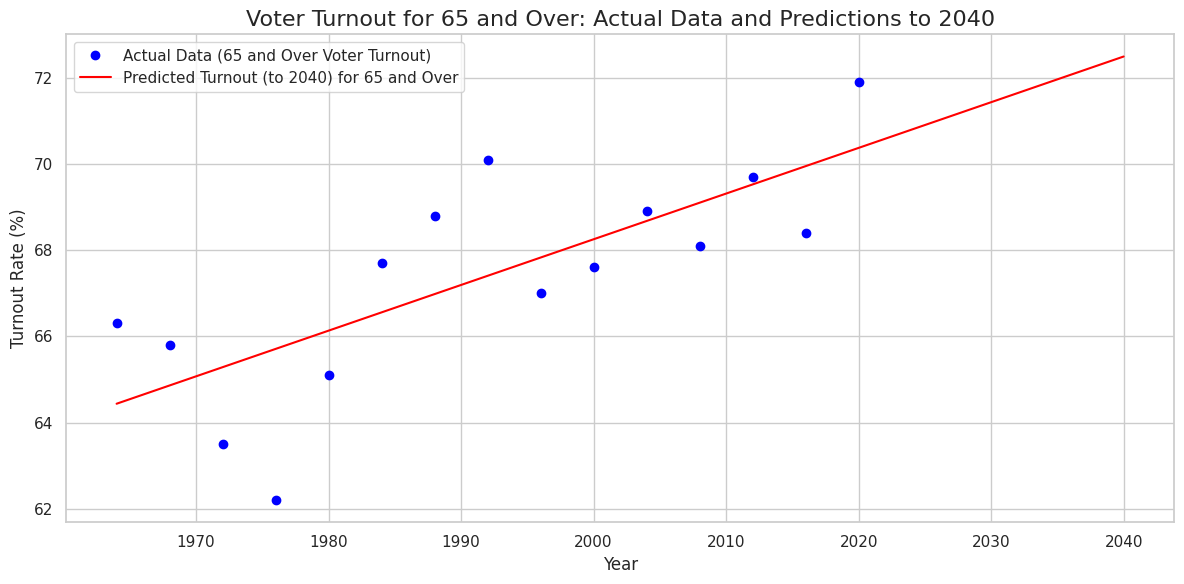

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Specify the age group you want to predict turnout for
age_group = '65 and Over'

# Prepare the data
# Extract the years and voter turnout for the specified age group
years = voter_data['Year'].values.reshape(-1, 1)  # Use the 'Year' column as X
age_turnout = voter_data[age_group].values  # Use the turnout for the specified age group as y

# Train the Linear Regression model
model = LinearRegression()
model.fit(years, age_turnout)

# Make predictions for future years
future_years = np.arange(years.min(), 2041).reshape(-1, 1)  # Predict from the earliest year to 2040
age_turnout_predictions = model.predict(future_years)

# Plot the actual data and predictions
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(years, age_turnout, 'o', label=f'Actual Data ({age_group} Voter Turnout)', color='blue')

# Plot predictions
plt.plot(future_years, age_turnout_predictions, '-', label=f'Predicted Turnout (to 2040) for {age_group}', color='red')

# Formatting the plot
plt.title(f'Voter Turnout for {age_group}: Actual Data and Predictions to 2040', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Turnout Rate (%)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


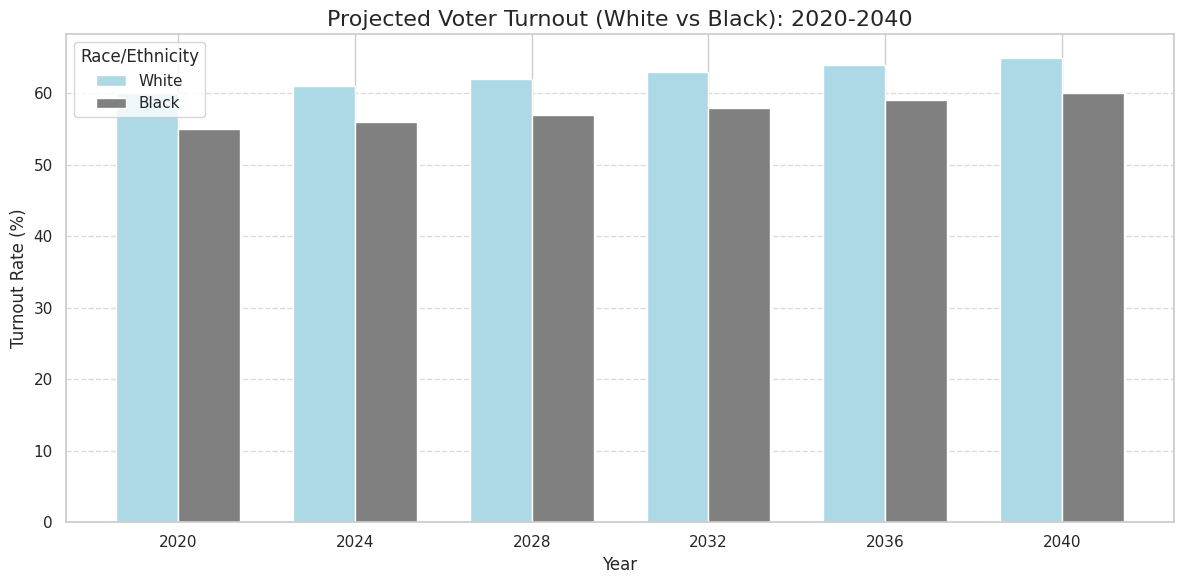

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Re-load necessary data for this graph example (mock data based on context)
data = {
    "Year": np.arange(2020, 2041, 1),
    "White_Turnout": np.linspace(60, 65, 21),
    "Black_Turnout": np.linspace(55, 60, 21)
}
future_voter_turnout = pd.DataFrame(data)

# Ensure the years are properly spaced for increments of 4
future_voter_turnout = future_voter_turnout[future_voter_turnout["Year"] % 4 == 0]

# Create bar chart with white and black turnout predictions
plt.figure(figsize=(12, 6))
bar_width = 0.35
positions = np.arange(len(future_voter_turnout["Year"]))

plt.bar(positions - bar_width / 2, future_voter_turnout["White_Turnout"], bar_width, label="White", color="lightblue")
plt.bar(positions + bar_width / 2, future_voter_turnout["Black_Turnout"], bar_width, label="Black", color="gray")

# Formatting
plt.title("Projected Voter Turnout (White vs Black): 2020-2040", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Turnout Rate (%)", fontsize=12)
plt.xticks(positions, future_voter_turnout["Year"])
plt.legend(title="Race/Ethnicity")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()


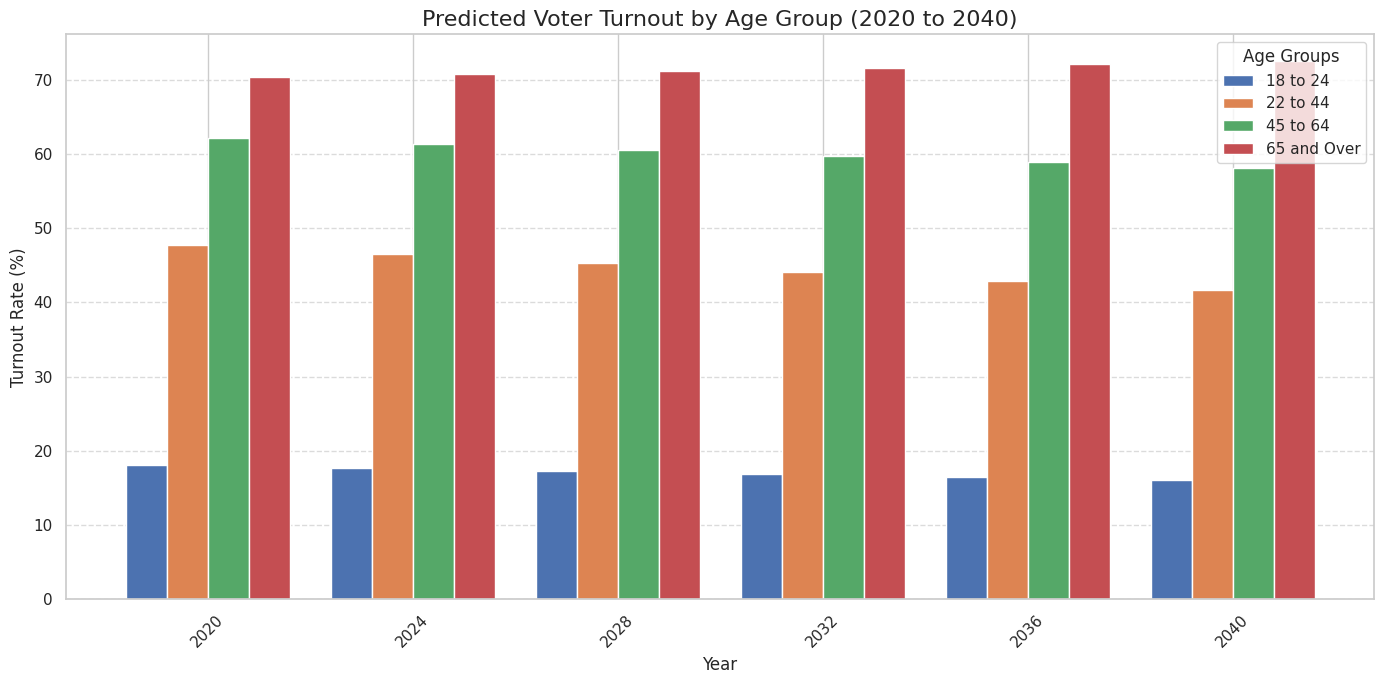

In [ ]:
# Adding other age groups side by side for comparison, with future predictions from 2020 to 2040 (increments of 4)

# Make predictions for all age groups
age_groups = ['18 to 24', '22 to 44', '45 to 64', '65 and Over']
future_predictions = {}

for age_group in age_groups:
    model = LinearRegression()
    model.fit(voter_data['Year'].values.reshape(-1, 1), voter_data[age_group].values)
    future_predictions[age_group] = model.predict(future_years)

# Create the future dataframe
future_age_turnout = pd.DataFrame({
    'Year': future_years.flatten(),
    '18 to 24': future_predictions['18 to 24'],
    '22 to 44': future_predictions['22 to 44'],
    '45 to 64': future_predictions['45 to 64'],
    '65 and Over': future_predictions['65 and Over']
})

# Filter for every 4 years starting from 2020
future_age_turnout_filtered = future_age_turnout[future_age_turnout['Year'] % 4 == 0]

# Plot the data
plt.figure(figsize=(14, 7))
width = 0.2  # Width of each bar

# Set positions for each group
x_positions = np.arange(len(future_age_turnout_filtered['Year']))

for i, age_group in enumerate(age_groups):
    plt.bar(
        x_positions + (i - 1.5) * width,
        future_age_turnout_filtered[age_group],
        width=width,
        label=age_group
    )

# Formatting the plot
plt.title('Predicted Voter Turnout by Age Group (2020 to 2040)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Turnout Rate (%)', fontsize=12)
plt.xticks(x_positions, future_age_turnout_filtered['Year'].astype(int), rotation=45)
plt.legend(title='Age Groups')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()
